# `ilastikrag` Quickstart Tutorial

In [1]:
%matplotlib inline
import matplotlib
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)
from ilastikrag.util import colorize_labels
from collections import OrderedDict

In [2]:
import numpy as np
import pandas as pd
import vigra
import ilastikrag

## Load Data

In [3]:
# Note: Rag inputs must be VigraArray (with axistags)
grayscale =   vigra.impex.readImage('grayscale.png', dtype='NATIVE').withAxes('yx')
membranes =   vigra.impex.readImage('membranes.png', dtype='NATIVE').withAxes('yx')
superpixels = vigra.impex.readImage('superpixels.png', dtype=np.uint32).withAxes('yx')

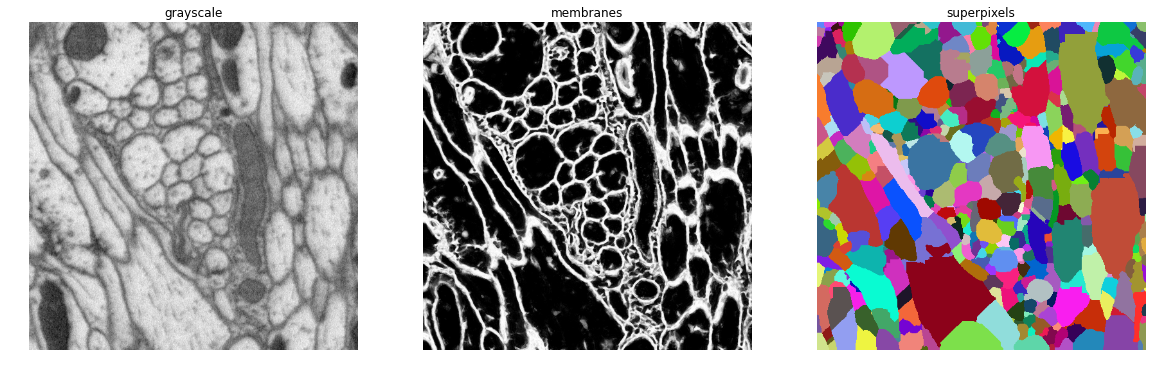

In [4]:
vigra.multiImshow(OrderedDict( [('grayscale',   (grayscale, 'img')),
                                ('membranes',   (membranes, 'img')),
                                ('superpixels', (colorize_labels(superpixels), 'img'))]), (1,3))

## Create Rag

In [5]:
rag = ilastikrag.Rag(superpixels)

## Compute features (grayscale channel)

In [6]:
grayscale_features = rag.compute_features(grayscale, ['standard_edge_mean', 'standard_sp_quantiles_50'])
grayscale_features[:5]

,sp1,sp2,standard_edge_mean,standard_sp_quantiles_50_sum,standard_sp_quantiles_50_difference
0,1,2,78.750000,179.339844,12.246094
1,1,6,90.794121,184.040863,7.545074
2,1,378,91.807693,196.525391,4.939453
3,2,6,76.666664,171.794769,4.701019
4,2,288,81.199997,201.177734,34.083984


## Compute features (membrane channel)

In [7]:
membrane_features = rag.compute_features(membranes, ['standard_edge_quantiles'])
membrane_features[:5]

,sp1,sp2,standard_edge_quantiles_0,standard_edge_quantiles_10,standard_edge_quantiles_25,standard_edge_quantiles_50,standard_edge_quantiles_75,standard_edge_quantiles_90,standard_edge_quantiles_100
0,1,2,220.5,221.024994,221.812500,223.125000,224.312500,225.024994,225.5
1,1,6,81.0,98.414062,124.511719,157.382812,198.222656,235.141403,235.5
2,1,378,115.5,116.144531,128.496094,145.429688,158.876953,202.007812,205.0
3,2,6,233.0,241.054688,244.208984,246.699219,249.189453,250.683594,252.0
4,2,288,206.0,217.148438,236.323242,241.386719,245.537109,249.023438,252.0


## Combine feature tables into `ndarray`

In [8]:
grayscale_feature_array = grayscale_features.iloc[:,2:].values # drop sp columns
membrane_feature_array = membrane_features.iloc[:,2:].values
all_features_array = np.concatenate((grayscale_feature_array, membrane_feature_array), axis=1)
print all_features_array[:5]

[[  78.75        179.33984375   12.24609375  220.5         221.0249939
   221.8125      223.125       224.3125      225.0249939   225.5       ]
 [  90.79412079  184.04086304    7.54507446   81.           98.4140625
   124.51171875  157.3828125   198.22265625  235.1414032   235.5       ]
 [  91.80769348  196.52539062    4.93945312  115.5         116.14453125
   128.49609375  145.4296875   158.87695312  202.0078125   205.        ]
 [  76.66666412  171.79476929    4.70101929  233.          241.0546875
   244.20898438  246.69921875  249.18945312  250.68359375  252.        ]
 [  81.19999695  201.17773438   34.08398438  206.          217.1484375
   236.32324219  241.38671875  245.53710938  249.0234375   252.        ]]


## Show supported feature names

In [9]:
for feature_name in rag.supported_features():
    print feature_name

standard_sp_count
standard_sp_sum
standard_sp_minimum
standard_sp_maximum
standard_sp_mean
standard_sp_variance
standard_sp_kurtosis
standard_sp_skewness
standard_sp_quantiles
standard_sp_quantiles_0
standard_sp_quantiles_10
standard_sp_quantiles_25
standard_sp_quantiles_50
standard_sp_quantiles_75
standard_sp_quantiles_90
standard_sp_quantiles_100
standard_sp_regionradii
standard_sp_regionradii_0
standard_sp_regionradii_1
standard_sp_regionaxes
standard_sp_regionaxes_0x
standard_sp_regionaxes_0y
standard_sp_regionaxes_1x
standard_sp_regionaxes_1y
standard_edge_count
standard_edge_sum
standard_edge_minimum
standard_edge_maximum
standard_edge_mean
standard_edge_variance
standard_edge_kurtosis
standard_edge_skewness
standard_edge_quantiles
standard_edge_quantiles_0
standard_edge_quantiles_10
standard_edge_quantiles_25
standard_edge_quantiles_50
standard_edge_quantiles_75
standard_edge_quantiles_90
standard_edge_quantiles_100
edgeregion_edge_area
edgeregion_edge_regionradii
edgeregion_edg

## GUI: Ask the user for feature selections
Note: `ilastikrag.gui` requires `pyqt4`

In [10]:
import ilastikrag.gui
from ilastikrag.gui import FeatureSelectionDialog

default_selections = { 'grayscale' : ['standard_sp_count',
                                      'standard_sp_quantiles_50',
                                      'edgeregion_edge_regionradii_0'],
                       'membranes' : ['standard_edge_mean',
                                      'standard_edge_minimum',
                                      'standard_edge_variance'] }

user_selections = FeatureSelectionDialog.launch(['grayscale', 'membranes'],
                                                rag.supported_features(),
                                                default_selections)

for channel_name, feature_names in user_selections.items():
    print "Selections for '{}':".format(channel_name)
    for feature_name in feature_names:
        print "    {}".format(feature_name)
    print ""

Selections for 'grayscale':
    edgeregion_edge_regionradii_0
    standard_sp_count
    standard_sp_quantiles_50

Selections for 'membranes':
    standard_edge_mean
    standard_edge_minimum
    standard_edge_variance

